# **Bloom Analysis - Red_Maple_Breaking**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings("ignore")

## Open file and load data

In [3]:
# download the csv file
pheno_red_maple_breaking_leaves = "https://drive.usercontent.google.com/download?id=1d5fzvGjQP0D-U62eTdwYmenTvCbH6AMZ&export=download&authuser=0&confirm=t&uuid=e63b6c24-c8ad-4364-b88a-a39cbb9cb934&at=APZUnTULF6dNjsHqziXn9k_Rix2-:1715039951490"
original_data = pd.read_csv(pheno_red_maple_breaking_leaves)

In [4]:
# presere a copy of the original data
df = original_data.copy()
# view the first five entries of the dataset
df = df.rename(columns = {'Breaking_Lvs_Min_DOY':'DOY'})
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY
0,Acer,rubrum,2,Home,ME,2011,117
1,Acer,rubrum,2,Home,ME,2012,83
2,Acer,rubrum,2,Home,ME,2013,114
3,Acer,rubrum,2,Home,ME,2014,125
4,Acer,rubrum,2,Home,ME,2015,124


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Genus      545 non-null    object
 1   Species    545 non-null    object
 2   Site_ID    545 non-null    int64 
 3   Site_Name  545 non-null    object
 4   State      545 non-null    object
 5   Year       545 non-null    int64 
 6   DOY        545 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 29.9+ KB


## Unique Genera

1 unique genera:
['Acer']


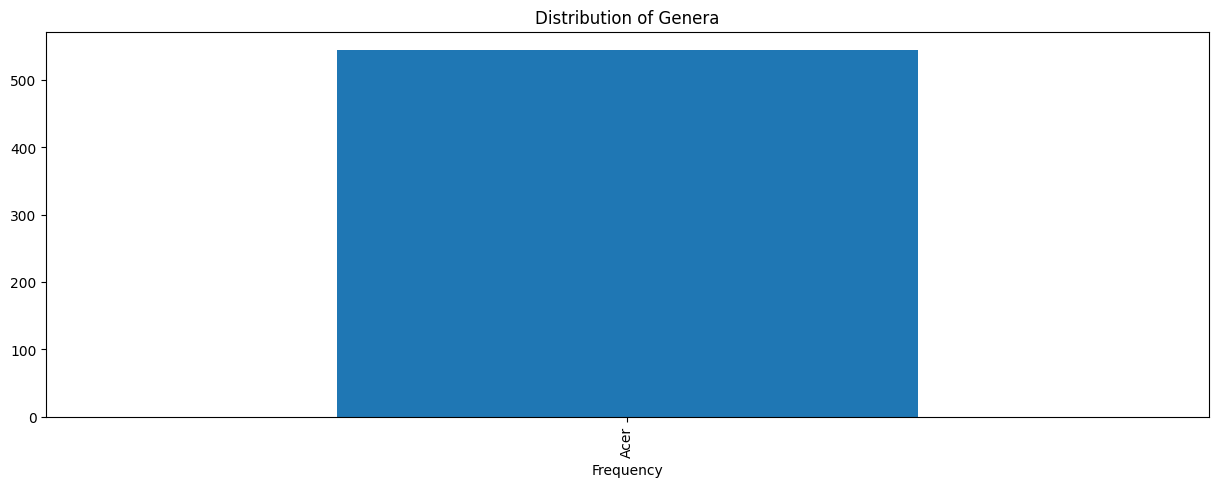

In [6]:
genus_list = df['Genus'].unique()

plt.figure(figsize = (15,5))
print(len(genus_list), 'unique genera:')
print(genus_list)
df['Genus'].value_counts().plot.bar()
plt.xlabel('Frequency')
plt.title('Distribution of Genera')
plt.show()

## Unique Species

1 unique species:
['rubrum']


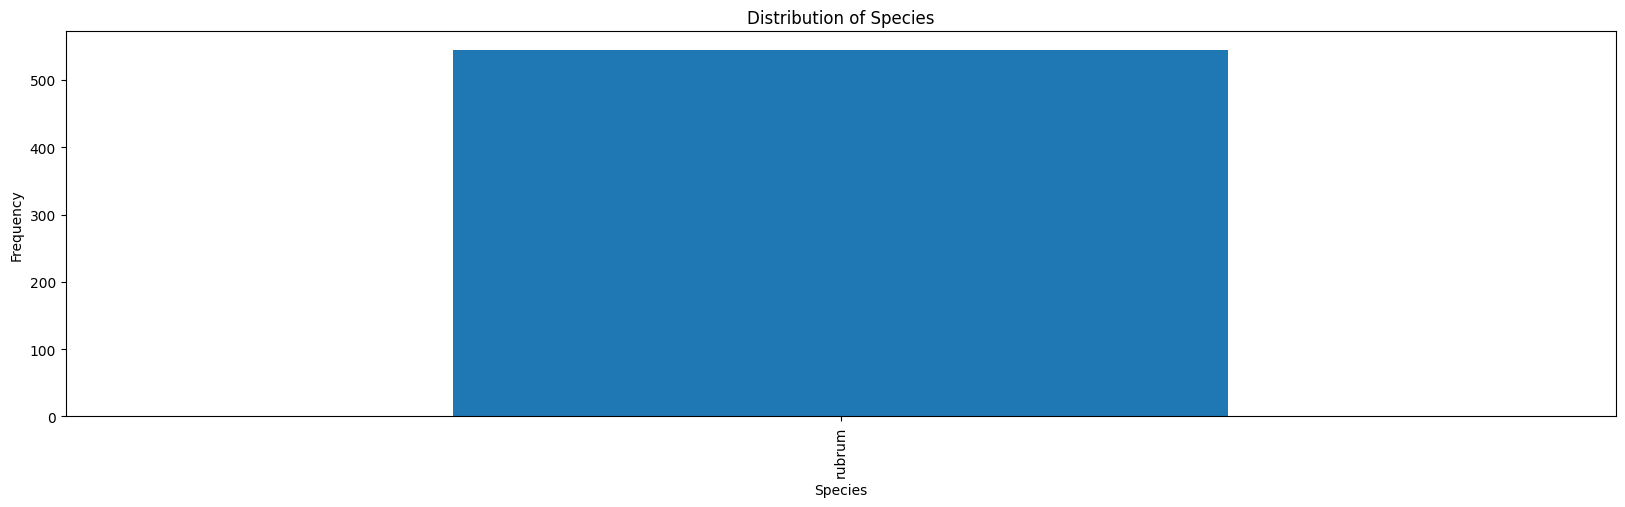

In [7]:
specie_list = df['Species'].unique()

print(len(specie_list), 'unique species:')
print(specie_list)

plt.figure(figsize=(20,5))
df['Species'].value_counts().plot.bar()
plt.ylabel('Frequency')
plt.title('Distribution of Species')
plt.show()

## Sites and States

In [8]:
state_counts = df['State'].value_counts().reset_index()
print('state_counts: \n',state_counts.sort_values('count', ascending=False).head().to_markdown(),'\n')
state_sites = df.groupby('State')['Site_Name'].nunique().reset_index()
print('state_sites: \n',state_sites.sort_values('Site_Name', ascending = False).head().to_markdown())

state_counts: 
 |    | State   |   count |
|---:|:--------|--------:|
|  0 | NY      |     138 |
|  1 | NH      |      95 |
|  2 | ME      |      80 |
|  3 | MA      |      55 |
|  4 | MN      |      52 | 

state_sites: 
 |    | State   |   Site_Name |
|---:|:--------|------------:|
|  9 | NY      |          15 |
|  8 | NH      |          11 |
|  4 | ME      |           8 |
|  2 | MA      |           7 |
|  6 | MN      |           6 |


In [9]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_sites['State'],
    z=state_sites['Site_Name'],
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Count'
))

fig.update_layout(
    title_text='Prevalence of Sites by State',
    geo_scope='usa'
)

fig.show()

In [10]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_counts['State'],
    z=state_counts['count'],
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Count'
))

fig.update_layout(
    title_text='Prevalence of Data Points by State',
    geo_scope='usa'
)

fig.show()

### List of All Sites by State

In [11]:
# print all site names by state
df.groupby('State')['Site_Name'].value_counts()

State  Site_Name                                          
CT     Burlingham_west                                         9
IL     backyard                                                9
MA     Big_Meadow_North                                        9
       back_yard                                               9
       Red_Maple_1_9                                           8
       Ecology_Phenology_Project                               8
       home                                                    7
       First_Meadow                                            7
       HARV_053.phenology.phe_primary                          7
MD     Ford_Mine_Trail                                         7
ME     my_front_yard                                          20
       my_back_yard                                           13
       Rachel_Carson_National_Wildlife_Refuge_Headquarters    11
       My_yard                                                10
       Sues_site               

# Form groups based on unique combinations of genus, species, location

In [12]:
# create a new column to capture the categories the entry pertains to
categories = []
for ind in df.index:
  category = (df['Genus'][ind],df['Species'][ind], df['Site_Name'][ind], df['State'][ind])
  categories.append(category)
df['categories'] = categories

In [13]:
# view the new column
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
0,Acer,rubrum,2,Home,ME,2011,117,"(Acer, rubrum, Home, ME)"
1,Acer,rubrum,2,Home,ME,2012,83,"(Acer, rubrum, Home, ME)"
2,Acer,rubrum,2,Home,ME,2013,114,"(Acer, rubrum, Home, ME)"
3,Acer,rubrum,2,Home,ME,2014,125,"(Acer, rubrum, Home, ME)"
4,Acer,rubrum,2,Home,ME,2015,124,"(Acer, rubrum, Home, ME)"


In [14]:
category_list = df.categories.unique()
print('There are',len(category_list),'unique cominations of genus, species, and site in the data')

There are 66 unique cominations of genus, species, and site in the data


## Map each group to the subset of data that it consists of

In [15]:
# create hash map to map unique categories to the data points falling into those categories
categorized_data = {}

# # for each category group observed in df, map the associated data to the category group
for category in category_list:


  criteria1 = df['Genus'] == category[0]
  criteria2 = df['Species'] == category[1]
  criteria3 = df['Site_Name'] == category[2]
  criteria4 = df['State'] == category[3]


  categorized_data.update({category:df[criteria1 & criteria2 & criteria3 & criteria4]})



## Visualize an Example

In [16]:
# enter search criteria
genus = 'Acer'
species = 'rubrum'
site = 'Home'
state = 'ME'

# view data associated with a given category group
example_data = categorized_data.get((genus, species, site, state))
example_data

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
0,Acer,rubrum,2,Home,ME,2011,117,"(Acer, rubrum, Home, ME)"
1,Acer,rubrum,2,Home,ME,2012,83,"(Acer, rubrum, Home, ME)"
2,Acer,rubrum,2,Home,ME,2013,114,"(Acer, rubrum, Home, ME)"
3,Acer,rubrum,2,Home,ME,2014,125,"(Acer, rubrum, Home, ME)"
4,Acer,rubrum,2,Home,ME,2015,124,"(Acer, rubrum, Home, ME)"
5,Acer,rubrum,2,Home,ME,2016,121,"(Acer, rubrum, Home, ME)"


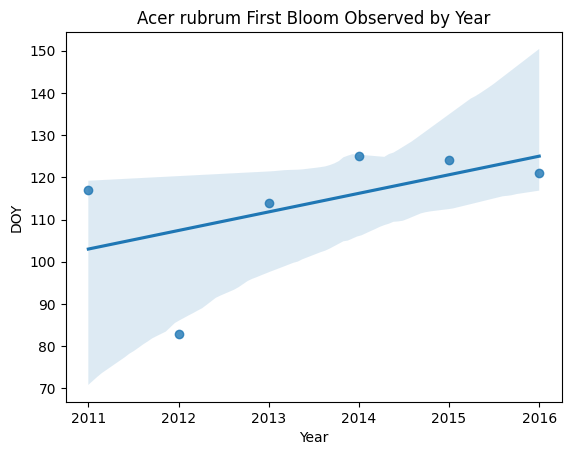

In [17]:
sns.regplot(example_data, x=example_data['Year'], y=example_data['DOY'])
plt.title(f'{genus} {species} First Bloom Observed by Year')
plt.show()

## Calculate Pearson correlation coefficient

In [18]:
x=example_data['Year']
y=example_data['DOY']

round(x.corr(y),4)

0.5227

# Perform regression and calculate relevant stats for all 66 unique groups

In [19]:
#create a list of the various category groups and a separte list of their respective correlations
category_groups = []
pearson_correlations = []
kendall_taus = []
regression_scores = []
slopes=[]
p_values = []
observations = []
results2 = []

# loop through all unique catgory groupings
for category in category_list:
  example_data = categorized_data.get(category)
  x=example_data['Year']   #reshape x data to work with sklearn linear model
  y=example_data['DOY']
  correlation = round(x.corr(y),4)
  tau, p_value = stats.kendalltau(x, y)


  #run the regression via statsmodel
  x = sm.add_constant(x)
  est = sm.OLS(y,x)
  est2 = est.fit()
  if len(est2.params) >= 2:
    slopes.append(round(est2.params[1],4))
  else:
    slopes.append(pd.NA)

  p_values.append(round(est2.pvalues[0],4))
  regression_scores.append(round(est2.rsquared,4))

  category_groups.append(category)
  pearson_correlations.append(correlation)
  kendall_taus.append(round(tau,4))
  observations.append(len(example_data['Year']))


correlation_df = pd.DataFrame({
    'dataset' : 'red_maple',
    'event' : 'breaking leaves',
    'grouping':category_groups,
    'observations':observations,
    'Pearson r': pearson_correlations,
    'Kendall τ': kendall_taus,
    'slope':slopes,
    'R²' : regression_scores,
    'p-value':p_values
})


In [20]:
# drop all rows containing NaN values (these result from instances where there is only one DOY observation)
correlation_df = correlation_df.dropna()

# view and save the dataframe
correlation_df.to_csv('/content/drive/MyDrive/Projects/Bloom Project/stats/redmaple_breaking_stats.csv', index=False) #running this line requires that you mount your drive!
print(correlation_df.to_string())
print(len(correlation_df), 'total instances')

      dataset            event                                                                 grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
0   red_maple  breaking leaves                                                 (Acer, rubrum, Home, ME)             6     0.5227     0.3333      4.4  0.2732   0.2927
1   red_maple  breaking leaves                                          (Acer, rubrum, PPN_9200010, MI)            13     0.0199    -0.0645    0.044  0.0004   0.9878
2   red_maple  breaking leaves                                          (Acer, rubrum, PPN_9239908, MO)             7     0.3114     0.1952   1.1466  0.0970   0.5133
4   red_maple  breaking leaves                                             (Acer, rubrum, backyard, IL)             9     0.0331    -0.1667   0.1173  0.0011   0.9646
5   red_maple  breaking leaves                                             (Acer, rubrum, backyard, MI)            13     0.4297     0.1677   1.5769  0.1846   0.1553
6   

In [21]:
correlation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,64.0,8.468750,2.822634,3.0000,7.000000,8.00000,10.000000,20.0000
Pearson r,64.0,-0.018780,0.450885,-0.8030,-0.471550,0.03670,0.375300,0.7796
Kendall τ,64.0,-0.024931,0.333458,-0.8000,-0.333300,0.01540,0.239675,0.5013
R²,64.0,0.200475,0.177441,0.0000,0.038375,0.16810,0.327600,0.6447
p-value,64.0,0.419605,0.303976,0.0107,0.163175,0.32865,0.622575,0.9878


### Restict observations to instances that saw a p-value < .05
#### Sorted by p-value


In [22]:
significant = correlation_df[correlation_df['p-value']<.05].sort_values('p-value')
print(significant.to_string())
print(len(significant), 'instances in total')

      dataset            event                          grouping  observations  Pearson r  Kendall τ   slope      R²  p-value
9   red_maple  breaking leaves  (Acer, rubrum, Bridge_Trail, NY)            12    -0.6992    -0.4545 -3.2733  0.4889   0.0107
46  red_maple  breaking leaves     (Acer, rubrum, Back_Yard, MN)             9     0.7796     0.4444  2.2306  0.6078   0.0149
2 instances in total


### Descriptive Statistics of Instance with p-value < .05:

In [23]:
significant.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,2.0,10.50000,2.121320,9.0000,9.750000,10.50000,11.250000,12.0000
Pearson r,2.0,0.04020,1.045670,-0.6992,-0.329500,0.04020,0.409900,0.7796
Kendall τ,2.0,-0.00505,0.635618,-0.4545,-0.229775,-0.00505,0.219675,0.4444
R²,2.0,0.54835,0.084075,0.4889,0.518625,0.54835,0.578075,0.6078
p-value,2.0,0.01280,0.002970,0.0107,0.011750,0.01280,0.013850,0.0149


###Significant Instances with Positive Slope:

In [24]:
positive_slopes = significant[significant['slope']>0].sort_values('slope')
print(positive_slopes.sort_values('slope', ascending = False).to_string())

      dataset            event                       grouping  observations  Pearson r  Kendall τ   slope      R²  p-value
46  red_maple  breaking leaves  (Acer, rubrum, Back_Yard, MN)             9     0.7796     0.4444  2.2306  0.6078   0.0149


### Descriptive Statistics of Positively Sloped Instances:

In [25]:
positive_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,1.0,9.0000,NaN,9.0000,9.0000,9.0000,9.0000,9.0000
Pearson r,1.0,0.7796,NaN,0.7796,0.7796,0.7796,0.7796,0.7796
Kendall τ,1.0,0.4444,NaN,0.4444,0.4444,0.4444,0.4444,0.4444
R²,1.0,0.6078,NaN,0.6078,0.6078,0.6078,0.6078,0.6078
p-value,1.0,0.0149,NaN,0.0149,0.0149,0.0149,0.0149,0.0149


### Significant Instances with Negative Slope:

In [26]:
negative_slopes = significant[significant['slope']<0].sort_values('slope')
print(negative_slopes.sort_values('slope').to_string())

     dataset            event                          grouping  observations  Pearson r  Kendall τ   slope      R²  p-value
9  red_maple  breaking leaves  (Acer, rubrum, Bridge_Trail, NY)            12    -0.6992    -0.4545 -3.2733  0.4889   0.0107


### Descriptive Statistics of Negatively Sloped Instances:

In [27]:
negative_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,1.0,12.0000,NaN,12.0000,12.0000,12.0000,12.0000,12.0000
Pearson r,1.0,-0.6992,NaN,-0.6992,-0.6992,-0.6992,-0.6992,-0.6992
Kendall τ,1.0,-0.4545,NaN,-0.4545,-0.4545,-0.4545,-0.4545,-0.4545
R²,1.0,0.4889,NaN,0.4889,0.4889,0.4889,0.4889,0.4889
p-value,1.0,0.0107,NaN,0.0107,0.0107,0.0107,0.0107,0.0107


### Positive/Negative Slope Count

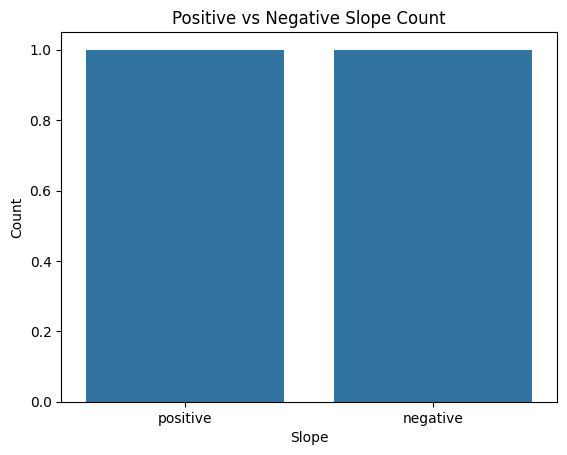

Number of positive slope examples: 1
Number of negative slope examples: 1


In [28]:
# Create a DataFrame
df = pd.DataFrame({
    'Array': ['positive', 'negative'],
    'Length': [len(positive_slopes), len(negative_slopes)]
})

# Create the plot
plot = sns.barplot(x='Array', y='Length', data=df)

# Set the title
plot.set_title('Positive vs Negative Slope Count')

# Set x and y-axis labels
plot.set_xlabel('Slope')
plot.set_ylabel('Count')

plt.show()

print('Number of positive slope examples:',len(positive_slopes))
print('Number of negative slope examples:',len(negative_slopes))

## 2, out of the original 66, groupings showed a statistically significant (p < .05) relationship between year and DOY


##1 have a positive slope
##1 has a negative slope